# Exercise 1
### Lars Kuehmichel, Nicolas Wolf

### 1 Loading the Dataset

In [135]:
from sklearn.datasets import load_digits

digits = load_digits()

print(digits.keys())

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

import numpy as np
print(data.dtype)


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
float64


In [136]:
threes = target == 3
eights = target == 8

which = threes | eights

bdata = data[which]
btarget = target[which]

bdata = np.append(bdata, np.ones((bdata.shape[0], 1)), axis=-1)

threes = btarget == 3
eights = btarget == 8

# +1 if target[i] == 3, else -1
labels = threes.astype(int) - eights.astype(int)


print(labels.shape)
print(bdata.shape)


(357,)
(357, 65)


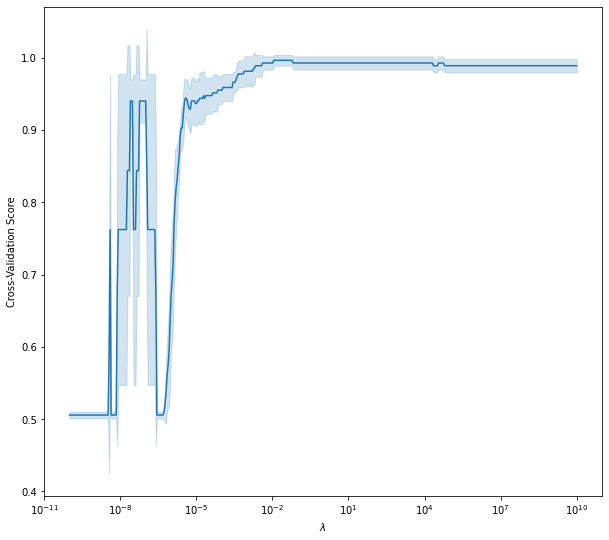

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from matplotlib import pyplot as plt

x_train, x_test, y_train, y_test = train_test_split(bdata, labels, random_state=42069)

cs = np.logspace(-10, 10, 500)

mu, sig = [], []

for c in cs:
    lr = LogisticRegression(C=c, max_iter=1000)

    scores = cross_val_score(lr, x_train, y_train, cv=5)

    mu.append(np.mean(scores))
    sig.append(np.std(scores))

mu = np.asarray(mu)
sig = np.asarray(sig)

# prefer high score with low std
i = np.argmax(mu - sig)
c = cs[i]

plt.figure(figsize=(10, 9))
plt.plot(cs, mu, color="C0")
plt.fill_between(cs, mu - sig, mu + sig, color="C0", alpha=0.2)
plt.xscale("log")
plt.xlabel(r"$\lambda$")
plt.ylabel("Cross-Validation Score")
plt.show()

In [138]:
lr = LogisticRegression(C=c, max_iter=1000)

lr.fit(x_train, y_train)

classified = lr.predict(x_test)

incorrect = classified != y_test

print("Error Rate:", np.mean(incorrect.astype(float)))





Error Rate: 0.0
